<a href="https://colab.research.google.com/github/Thanhvh/2015/blob/master/Copy_of_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1   Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# 2 Data preprocessing

## Import data

In [0]:
from google.colab import files
files.upload()

Saving monthly_1_full.csv to monthly_1_full.csv
Saving monthly_1_test.csv to monthly_1_test.csv
Saving monthly_1_train.csv to monthly_1_train.csv


{'monthly_1_full.csv': b'x\r\n8000\r\n8350\r\n8570\r\n7700\r\n7080\r\n6520\r\n6070\r\n6650\r\n6830\r\n5710\r\n5260\r\n5470\r\n7870\r\n7360\r\n8470\r\n7880\r\n6750\r\n6860\r\n6220\r\n6650\r\n5450\r\n5280\r\n4970\r\n5550\r\n7750\r\n7760\r\n7190\r\n7440\r\n6590\r\n6210\r\n6010\r\n6390\r\n5780\r\n5700\r\n4680\r\n4970\r\n6850\r\n6740\r\n7490\r\n6250\r\n6900\r\n5870\r\n5610\r\n6310\r\n6110\r\n6090\r\n5810\r\n6060\r\n6950\r\n7820\r\n8270\r\n7840\r\n7850\r\n6710\r\n6220\r\n7430\r\n6560\r\n7080\r\n6680\r\n6900\r\n8680\r\n8450\r\n8670\r\n8470\r\n7910\r\n8140\r\n7310\r\n7860\r\n7730\r\n7330\r\n7430\r\n7150\r\n8720\r\n8340\r\n8840\r\n8780\r\n8250\r\n8180\r\n7570\r\n9280\r\n9220\r\n9140\r\n8950\r\n8540\r\n9360\r\n9750\r\n9270\r\n8690\r\n8200\r\n7610\r\n7160\r\n8280\r\n7370\r\n7130\r\n6840\r\n7260\r\n7430\r\n7950\r\n7790\r\n8090\r\n7480\r\n6700\r\n6650\r\n6960\r\n6410\r\n6310\r\n5930\r\n5980\r\n6730\r\n7410\r\n7200\r\n6960\r\n6780\r\n5720\r\n6040\r\n5990\r\n6210\r\n6460\r\n5490\r\n5790\r\n6350\r\n62

In [0]:
dataset = pd.read_csv("monthly_1_full.csv").values

In [0]:
train_df = pd.read_csv("monthly_1_train.csv")
train = train_df.values

In [0]:
test_df = pd.read_csv("monthly_1_test.csv")
test = test_df.values

## Feature scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Creat data structure with 60 timestep and one output

In [0]:
X_train = []

In [0]:
Y_train = []

In [0]:
for i in range(60, 469):
  X_train.append(train_sc[i-60:i, 0])
  Y_train.append(train_sc[i, 0])

In [0]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [14]:
X_train.shape

(409, 60)

In [15]:
Y_train.shape

(409,)

## Reshape data: 3-Dimensions

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train.shape

(409, 60, 1)

# 3 Building RNN

## Initialzing RNN

In [0]:
regressor = Sequential()

## Add first LSTM layer and Dropout regularization

In [19]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
regressor.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Add second LSTM layer and Dropout regularization

In [0]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

## Add third LSTM layer and Dropout regularization

In [0]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

## Add fourth LSTM layer and Dropout regularization

In [0]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

## Add ouput layer

In [0]:
regressor.add(Dense(units=1))

## Compiling LSTM

In [0]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

## Fitting LSTM to the training set

In [26]:
regressor.fit(X_train, Y_train, epochs=100, batch_size=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
409/409 [==============================] - 10s 24ms/step - loss: 0.0311
Epoch 2/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0169
Epoch 3/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0142
Epoch 4/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0145
Epoch 5/100
409/409 [==============================] - 5s 11ms/step - loss: 0.0132
Epoch 6/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0135
Epoch 7/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0127
Epoch 8/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0110
Epoch 9/100
409/409 [==============================] - 5s 11ms/step - loss: 0.0121
Epoch 10/100
409/409 [==============================] - 5s 12ms/step - loss: 0.0120
Epoch 11/100
409/409 [==============================] - 5s 11ms/step - loss: 0.0125
Epoch 12/100
409/409 [==============

# 4 Predicting and visualizing

## Predicting

In [0]:
data_total = pd.concat((train_df, test_df), axis = 0)

In [0]:
inputs = data_total[len(data_total) - len(test_df) - 60:].values

In [0]:
inputs = inputs.reshape(-1,1)

In [0]:
inputs = scaler.transform(inputs)

In [0]:
X_test = []

In [0]:
for i in range(60, 78):
  X_test.append(inputs[i-60:i, 0])

In [0]:
X_test= np.array(X_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted = regressor.predict(X_test)

In [0]:
predicted = scaler.inverse_transform(predicted)

In [37]:
print(predicted)

[[7921.709 ]
 [6849.9604]
 [6043.574 ]
 [5655.106 ]
 [5649.251 ]
 [5848.493 ]
 [5977.634 ]
 [5810.298 ]
 [5364.7715]
 [5178.5244]
 [6055.6816]
 [7790.0356]
 [7834.317 ]
 [6751.534 ]
 [5836.911 ]
 [5466.4414]
 [5556.549 ]
 [5857.8994]]


## Visualizing

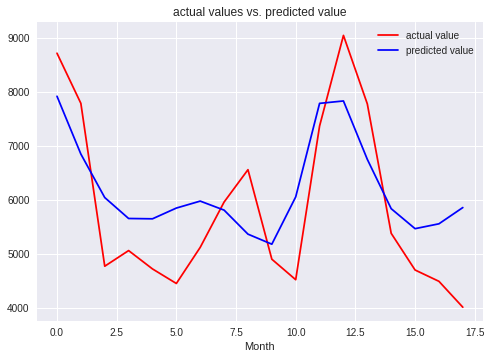

In [38]:
plt.plot(test, color = 'red', label = 'actual value')
plt.plot(predicted, color = 'blue', label = 'predicted value')
plt.title('actual values vs. predicted value')
plt.xlabel('Month')
plt.legend()
plt.show()

# 5 Evaluating the RNN

In [0]:
import math
from sklearn.metrics import mean_squared_error

In [40]:
rmse = math.sqrt(mean_squared_error(test, predicted))
rmse

1027.3835041892764

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {'batch_size': [12],
             'epochs': [100],
             'optimizer': ['adam', 'rmsprop']}

In [0]:
grid_search = GridSearchCV(estimator = regressor,
                          param_grid = parameters,
                          scoring = 'neg_mean_squared_error',
                          cv = 2)

In [0]:
grid_search = grid_search.fit(X_train, Y_train)

In [0]:
best_parameters = grid_search.best_params_

In [0]:
best_accuracy = grid_search.best_score_

In [0]:
regressor = Keras